In [18]:
setwd("/Users/ewatrebacz/Documents/komputerowa_analiza_szeregow_czasowych/laboratorium/raport1/raport")
library("pracma")
library("tidyverse")
library("e1071")
library("ggplot2")
library("ggExtra")
library("egg")
library("moments")

In [19]:
dataset <- read.csv("data4.csv", header = TRUE, sep = ";")
dochody <- as.numeric(dataset[2, 4:276])
wydatki <- as.numeric(dataset[3, 4:276])

df <- data.frame(dochody = dochody, wydatki = wydatki)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“niekompletna końcowa linia znaleziona przez 'readTableHeader' w 'data4.csv'”


# Analiza jednowymiarowa

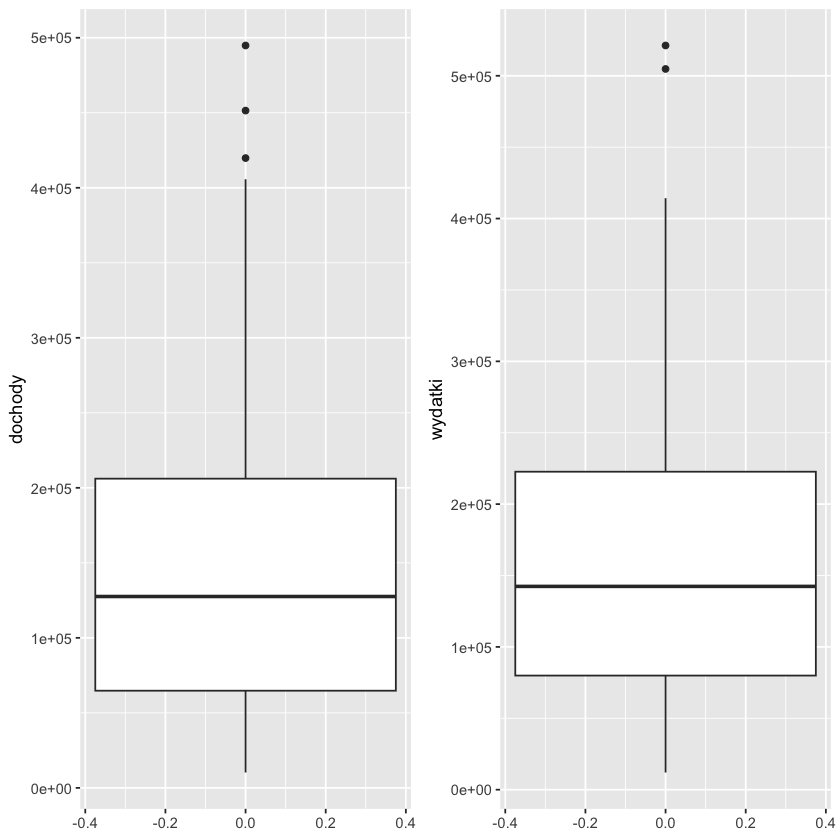

In [20]:
doch_box <-ggplot(df, aes(y = dochody)) +
geom_boxplot()

wyd_box <-ggplot(df, aes(y = wydatki)) +
geom_boxplot()

ggarrange(doch_box, wyd_box, ncol = 2)

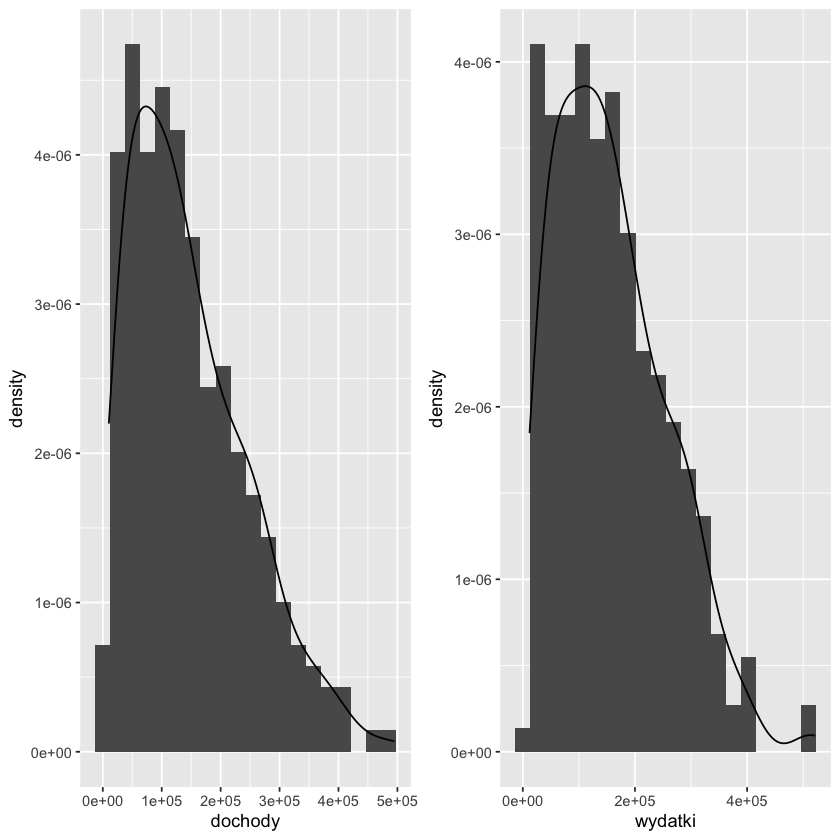

In [21]:
doch_hist <-ggplot(df, aes(x = dochody)) +
geom_histogram(
    bins = 20,
    aes(y = ..density..)
    ) +
geom_density()
# geom_histogram(aes( y = ..density..))


wyd_hist <-ggplot(df, aes(x = wydatki)) +
geom_histogram(
    bins = 20,
    aes(y = ..density..)
    ) +
geom_density()

ggarrange(doch_hist, wyd_hist, ncol = 2)


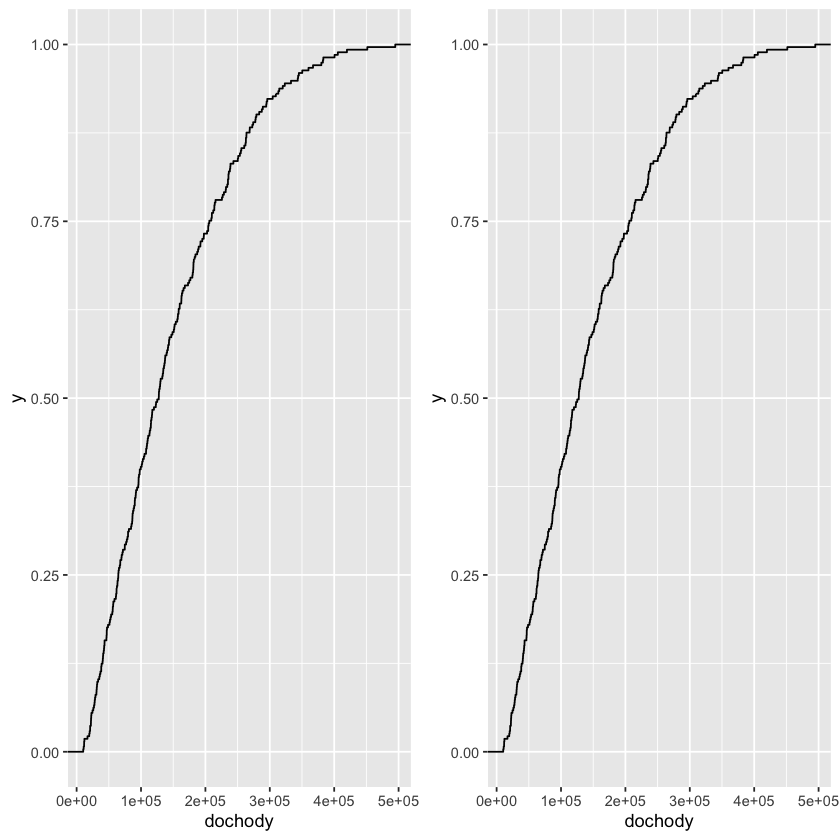

In [22]:
doch_ecdf <- ggplot(df, aes(x = dochody)) +
stat_ecdf(geom = "step")

wyd_ecdf <- ggplot(df, aes(x = dochody)) +
stat_ecdf(geom = "step")
ggarrange(doch_ecdf, wyd_ecdf, ncol = 2)



In [23]:
print("Wariancja")
print(var(df$dochody))
print(var(df$wydatki))
print("Średnia")
print(mean(df$dochody))
print(mean(df$wydatki))
print("Mediana")
print(median(df$dochody))
print(median(df$wydatki))
print("Skośność")
print(skewness(df$dochody))
print(skewness(df$wydatki))
print("Kurtoza")
print(kurtosis(df$dochody))
print(kurtosis(df$wydatki))
print("Kwartyle")
print(quantile(df$dochody))
print(quantile(df$wydatki))
print("Rozstęp")
print(max(df$dochody) -  min(df$dochody))
print(max(df$wydatki) -  min(df$wydatki))

[1] "Wariancja"
[1] 9679174055
[1] 9862460554
[1] "Średnia"
[1] 144959.9
[1] 158220.7
[1] "Mediana"
[1] 127562.3
[1] 142383.1
[1] "Skośność"
[1] 0.864572
[1] 0.734565
[1] "Kurtoza"
[1] 3.286585
[1] 3.226846
[1] "Kwartyle"
      0%      25%      50%      75%     100% 
 10250.3  64777.3 127562.3 206105.8 494843.5 
      0%      25%      50%      75%     100% 
 12038.6  79927.9 142383.1 222702.9 521216.8 
[1] "Rozstęp"
[1] 484593.2
[1] 509178.2


# Analiza zależności liniowej

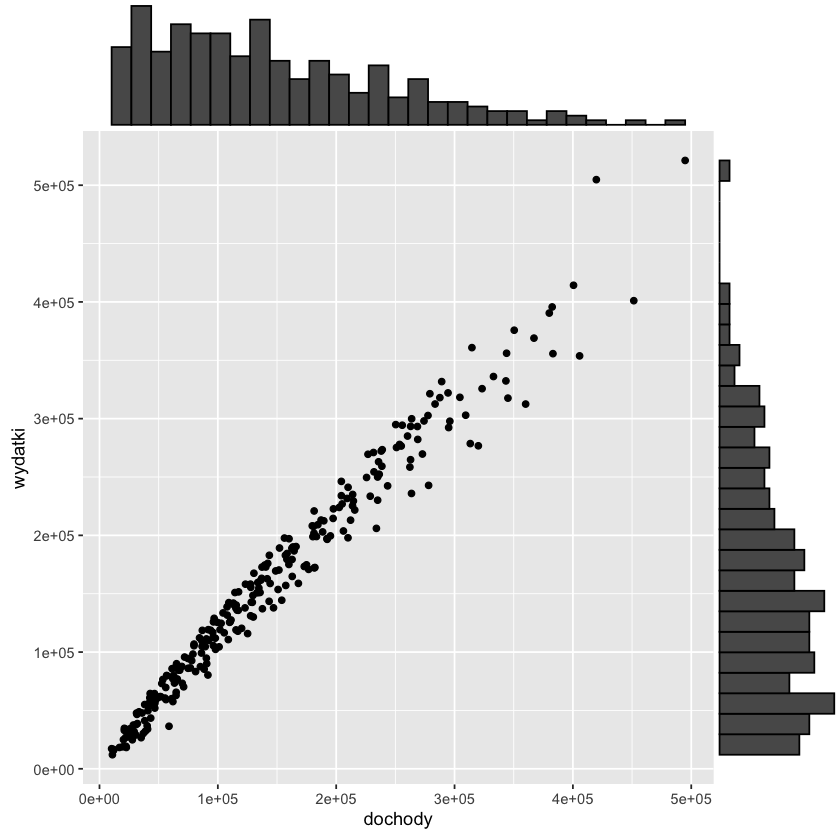

In [27]:
pl <-ggplot(df, aes(x = dochody, y = wydatki)) +
 geom_point()

ggMarginal(pl, type = "histogram")

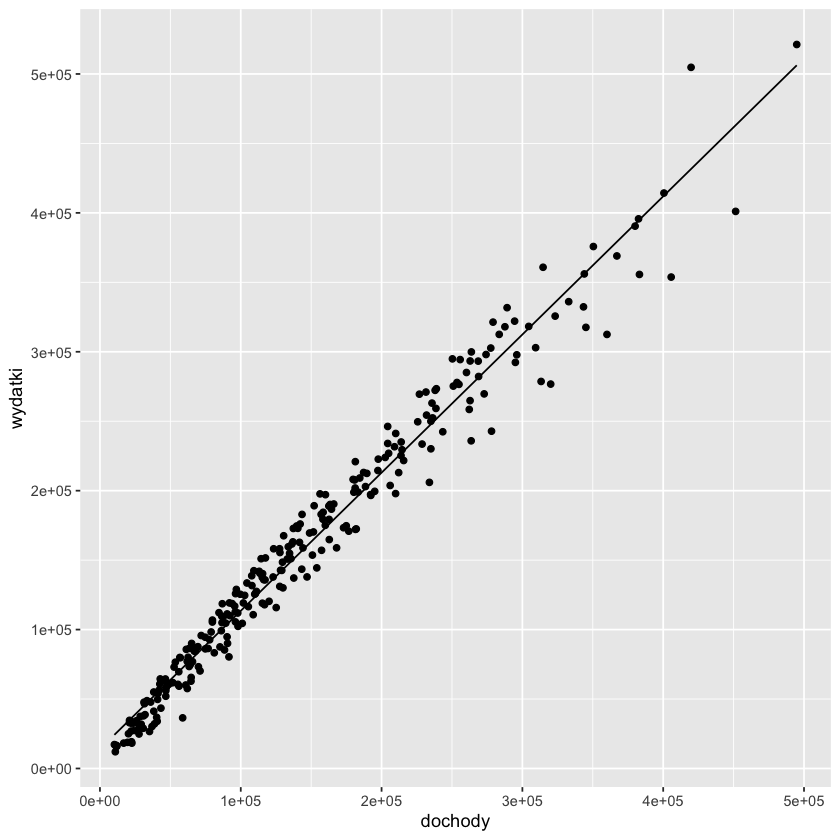

In [28]:
xs <- seq(min(df$dochody), max(df$dochody), length = 10);
fit <- polyfit(df$dochody, df$wydatki, n = 1);
regression <- polyval(fit, xs);
reg <- data.frame(x = xs, y = regression)


ggplot(df, aes(x = dochody, y = wydatki)) +
 geom_point() +
    geom_line(data = reg, aes(x= xs, y = regression))
# ggMarginal(pl, type = "histogram") +
# geom_line(data = reg, aes(x = xs, y = regression))

In [29]:
get_b0_b1 <- function(x, y){

  sum1 <- 0
  sum2 <- 0

  for(i in 1:length(x)){
    sum1 <- sum1 + x[i] * (y[i] - mean(y))
    sum2 <- sum2 + (x[i] - mean(x))^2
  }

  b1 <- sum1 / sum2
  b0 <- mean(y) - b1 * mean(x)

  return <- c(b0, b1)
}

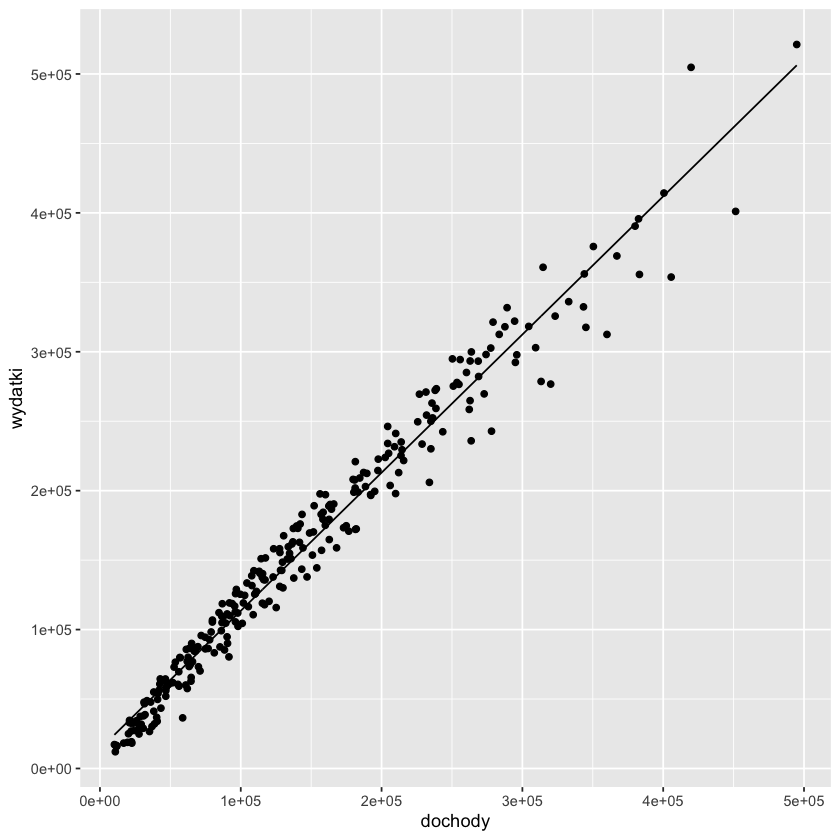

In [30]:
coef<- get_b0_b1(df$dochody, df$wydatki)
df$wydatki_reg <- c(df$dochody) * coef[2] + coef[1]

ggplot(df, aes(x = dochody, y = wydatki)) +
   geom_point() + 
   geom_line(aes(x= dochody, y = wydatki_reg))

## Estymacja przedziałowa

In [85]:
S2 <- 1 / (length(df$wydatki) - 2) * sum((df$wydatki - coef[1] - df$dochody * coef[2])^2)

In [86]:
alpha <- 0.05

In [87]:
B0_L <- coef[1] - qt(1 - alpha / 2, length(df$wydatki) - 2) * sqrt(S2) * sqrt(1 / length(df$wydatki) 
+ mean(df$dochody)^2 / sum((df$dochody - mean(df$dochody))^2))

In [88]:
B0_R <- coef[1] + qt(1 - alpha / 2, length(df$wydatki) - 2) * sqrt(S2) * sqrt(1 / length(df$wydatki) 
+ mean(df$dochody)^2 / sum((df$dochody - mean(df$dochody))^2))

In [89]:
c(B0_L, B0_R)

[1] 10433.20 17638.79

In [90]:
coef[1]

[1] 14035.99

In [91]:
B1_L <- coef[2] - qt(1 - alpha / 2, length(df$wydatki) - 2) * sqrt(S2) / 
sqrt(sum((df$dochody - mean(df$dochody))^2))

In [92]:
B1_R <- coef[2] + qt(1 - alpha / 2, length(df$wydatki) - 2) * sqrt(S2) / 
sqrt(sum((df$dochody - mean(df$dochody))^2))

In [93]:
c(B1_L, B1_R)

[1] 0.9740757 1.0152290

In [94]:
coef[2]

[1] 0.9946524

## Predykcja oraz przedziały ufności dla danych testowych

In [42]:
smp_size <- floor(0.7 * nrow(df))

set.seed(1234)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

training_set <- df[train_ind, ]
testing_set <- df[-train_ind, ]

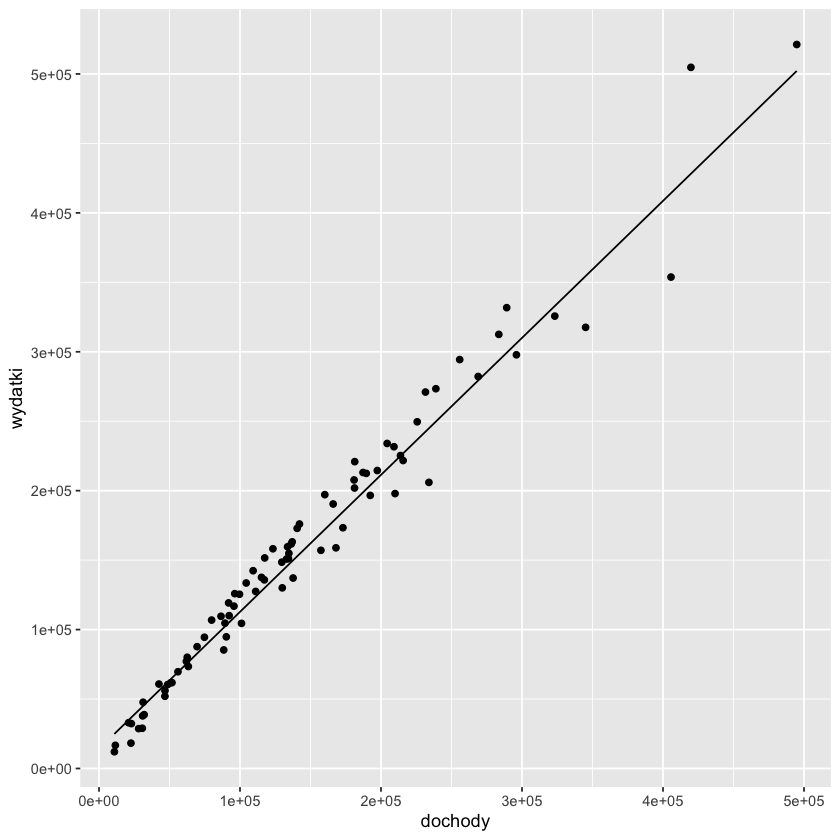

In [50]:
prediction <- get_b0_b1(training_set$dochody, training_set$wydatki)[1] + get_b0_b1(training_set$dochody, training_set$wydatki)[2] * testing_set$dochody
testing_set$y <- prediction
#plot(testing_set$dochody, testing_set$wydatki)
#lines(testing_set$dochody, prediction, type='p',col='pink')
ggplot(data=testing_set, aes(x=dochody, y=wydatki)) +
geom_point() +
geom_line(aes(x= dochody, y = prediction))

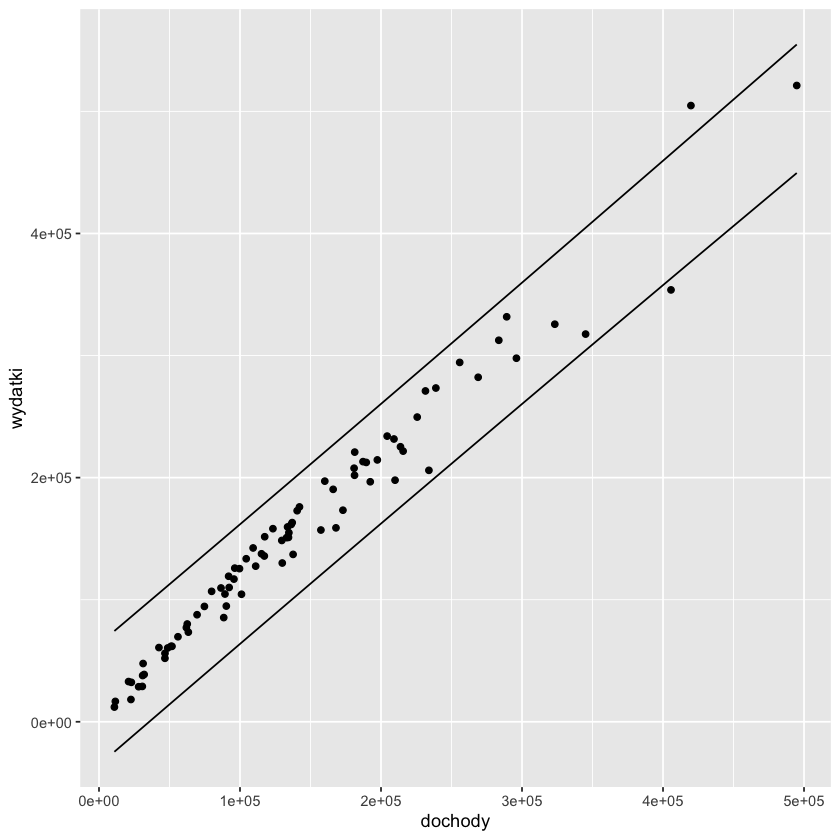

In [84]:
Y_L <- c()
Y_R <- c()
S2_2 <- 1 / (length(testing_set$wydatki) - 2) * sum((testing_set$wydatki - get_b0_b1(training_set$dochody, training_set$wydatki)[1] - testing_set$dochody * get_b0_b1(training_set$dochody, training_set$wydatki)[2])^2)

for(i in 1:length(testing_set$dochody)){
    Y_L[i] <- get_b0_b1(training_set$dochody, training_set$wydatki)[1] + get_b0_b1(training_set$dochody, training_set$wydatki)[2] * testing_set$dochody[i] - qt(1 - alpha/2, length(testing_set$dochody) - 2) * sqrt(S2_2) * (1 + 1/length(testing_set$dochody) + (testing_set$dochody[i] - mean(testing_set$dochody))^2 / sum((testing_set$dochody - mean(testing_set$dochody))^2))^(1/2)
    Y_R[i] <- get_b0_b1(training_set$dochody, training_set$wydatki)[1] + get_b0_b1(training_set$dochody, training_set$wydatki)[2] * testing_set$dochody[i] + qt(1 - alpha/2, length(testing_set$dochody) - 2) * sqrt(S2_2) * (1 + 1/length(testing_set$dochody) + (testing_set$dochody[i] - mean(testing_set$dochody))^2 / sum((testing_set$dochody - mean(testing_set$dochody))^2))^(1/2)
}

testing_set$Y_L <- Y_L
testing_set$Y_R <- Y_R

ggplot(data=testing_set, aes(x=dochody, y=wydatki)) +
geom_point() +
geom_line(aes(x= dochody, y = Y_L)) +
geom_line(aes(x= dochody, y = Y_R))
#testing_set

# Analiza residuów

In [ ]:
df$residua <- c(df$wydatki) - c(df$wydatki_reg)
head(df)

In [ ]:
sse <- sum((df$wydatki - df$wydatki_reg)**2)
sst <- sum((df$wydatki - mean(df$wydatki))**2)
ssr <- sum((df$wydatki_reg - mean(df$wydatki))**2)

print("Całkowita suma kwadratów")
print(sst)

print("Suma kwadratów błędów")
print(sse)

print("Regresyjna suma kwadratów błędów")
print(ssr)

print("Współczynnik determinancji")
print(ssr/sst)

print("Współczynnik korelacji Pearsona")
print(sqrt(ssr/sst))

In [ ]:
print("suma residuów")
sum((df$wydatki - df$wydatki_reg))

In [ ]:
print("Współczynnik korelacji Pearsona")
s_do <- sqrt(sum((df$dochody  - mean(df$dochody)) ** 2)/ length(df$dochody))
s_wyd <- sqrt(sum((df$wydatki  - mean(df$wydatki)) ** 2)/ length(df$wydatki))
sum((df$dochody - mean(df$dochody)) * (df$wydatki - mean(df$wydatki))) / (s_do * s_wyd * (length(df$wydatki) - 1))
